In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split , GridSearchCV ,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.svm import SVC
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\15-AU003TX\Ananconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
data = pd.read_csv('vehicle.csv')

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [56]:
data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [8]:
data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [58]:
data.shape

(846, 19)

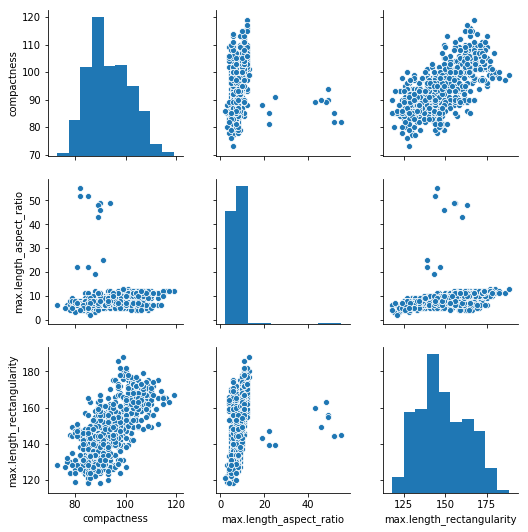

In [9]:
sns.pairplot(data[['compactness' ,'max.length_aspect_ratio','max.length_rectangularity']])

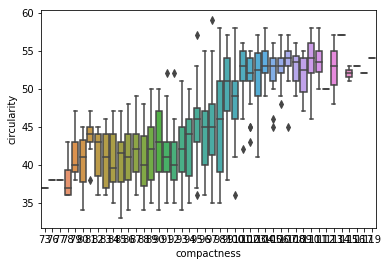

In [10]:
sns.boxplot(data['compactness'],data['circularity'])

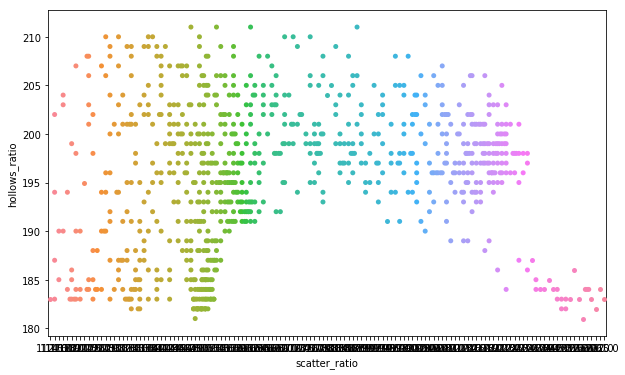

In [11]:
a = plt.figure(figsize=(10,6))
sns.swarmplot(data['scatter_ratio'],data['hollows_ratio'])

In [12]:
data.dropna(axis=0 , inplace=True)

In [13]:
data.tail(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


C:\Users\15-AU003TX\Ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


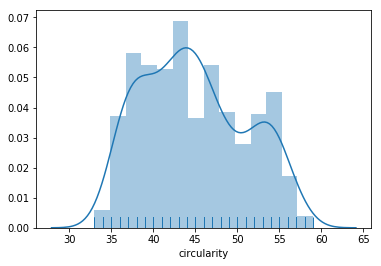

In [14]:
sns.distplot(data['circularity'] , kde="hex" , rug=True)

C:\Users\15-AU003TX\Ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


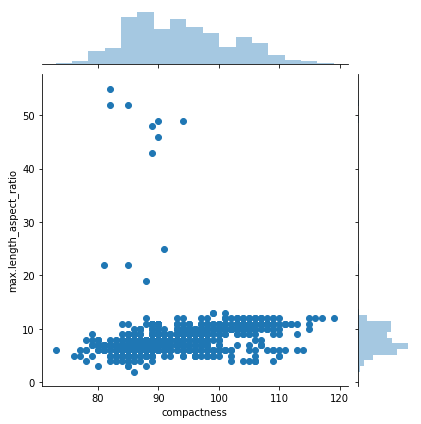

In [15]:
sns.jointplot(data['compactness'],data['max.length_aspect_ratio'])

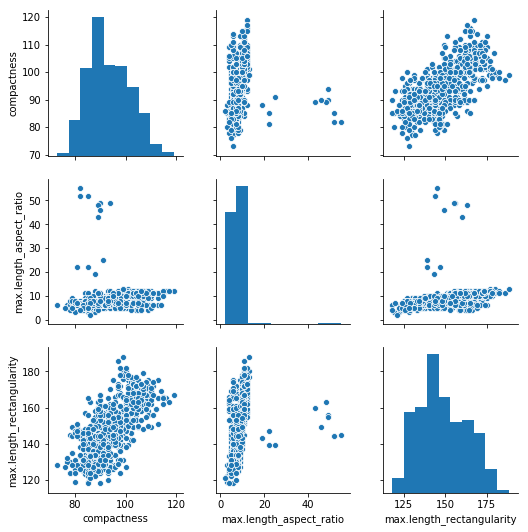

In [16]:
sns.pairplot((data[['compactness','max.length_aspect_ratio','max.length_rectangularity']]))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [18]:
data['hollows_ratio']=data['hollows_ratio'].astype('float64')
data['compactness']=data['compactness'].astype('float64')
data['max.length_aspect_ratio']=data['max.length_aspect_ratio'].astype('float64')
data['max.length_rectangularity']=data['max.length_rectangularity'].astype('float64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null float64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null float64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null float64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_rat

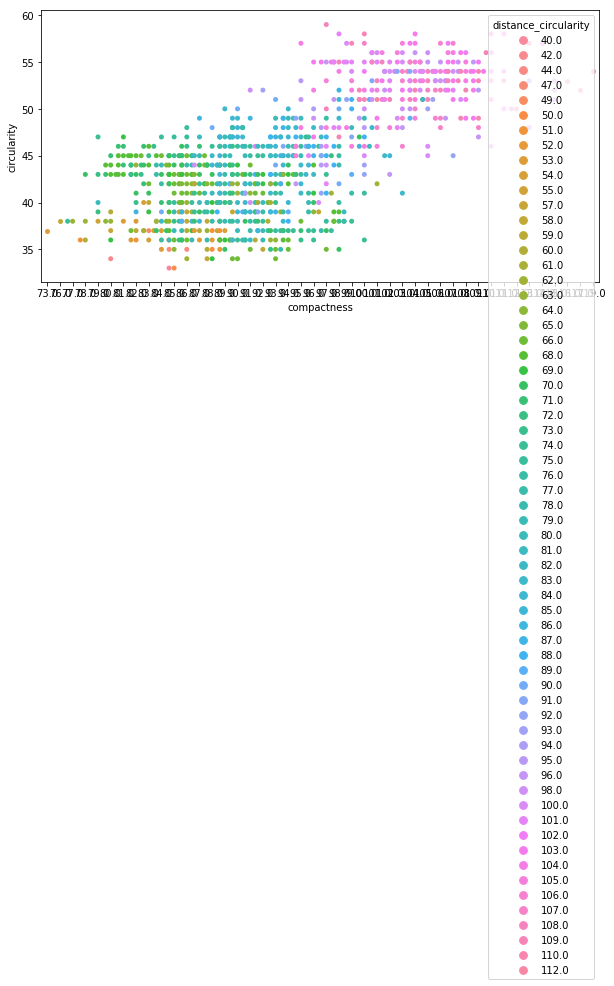

In [20]:
b =plt.figure(figsize=(10,5))
sns.swarmplot(data['compactness'],data['circularity'],data['distance_circularity'])

In [21]:
data.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [22]:
data['class']=data['class'].astype('str')
data['class'] = data['class'].replace({'car':1,'bus':2,'van':3})

In [23]:
data.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,3
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,3
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,3
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,2


In [24]:
#features=list(['compactness','max.length_aspect_ratio','max.length_rectangularity','hollows_ratio'])
features=list(data.columns[:18])
print(features)
X =data[features]
y =data['class']
#y = data.iloc[:, [18]]

['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']


In [25]:
X_train,X_test,y_train ,y_test = train_test_split(X,y , test_size=0.2,random_state=42)

In [26]:

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
parameter_candidates = [
  {'C': [0.01,0.05,0.5,1], 'kernel': ['linear']},
  {'C': [0.01,0.05,0.5,1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [44]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X, y) 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
print('Best score for data:', clf.best_score_) 

Best score for data: 0.965559655596556
